In [1]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)
import numpy as np
import pandas as pd
df = pd.read_csv('data/pix_train.csv', header = None)
df=df[1:]
# df=pd.DataFrame(df[0].str.split(expand=True))
df=df.astype(int)
data=df.values
df = pd.read_csv('data/pix_test.csv', header = None)
df=df[1:]
df=df.astype(int)
test=df.values
# tag=[]
# for i in range(0,1600):
#     tag1=[0,0,0,0,0,0,0,0,0,0]
#     tag1[int (i/160)]=1
#     tag.append(tag1)
# Y=np.array(tag)
# from sklearn.model_selection import train_test_split
# seed = 7
# test_size = 0.33
# x_Train, x_Test, y_Train, y_Test = train_test_split(data, Y, test_size=test_size, random_state=seed)
x_Train=data[:,0:240]
y_Train=data[:,240]
x_Test=test[:,0:240]
y_Test=test[:,240]
y_Train = tf.one_hot(y_Train,10)
y_Test = tf.one_hot(y_Test,10)
sess1=tf.Session()
y_Train, y_Test = sess1.run([y_Train,y_Test])

x_Train4D=x_Train.reshape(x_Train.shape[0],15,16,1).astype('float32')
x_Test4D=x_Test.reshape(x_Test.shape[0],15,16,1).astype('float32')
x_Train4D_normalize = x_Train4D / 255
x_Test4D_normalize = x_Test4D / 255
y_Train.shape

Instructions for updating:
non-resource variables are not supported in the long term


Using TensorFlow backend.


(1280, 10)

In [2]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model1 = Sequential()
model1.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(15,16,1), 
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.25))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(10,activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
class Metrics(Callback):
    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.validation_data[0]))).round()
        val_targ = self.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict,average='micro')
        _val_recall = recall_score(val_targ, val_predict,average='micro')
        _val_precision = precision_score(val_targ, val_predict,average='micro')
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print (" — val_f1: %f — val_precision: %f — val_recall %f" %(_val_f1, _val_precision, _val_recall))
        return

In [4]:
metrics = Metrics()
model1.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model1.fit(x=x_Train4D_normalize, 
                        y=y_Train,validation_split=0.2, callbacks=[metrics],
                        epochs=400, batch_size=300,verbose=2,validation_data=(x_Test4D_normalize,y_Test))

Train on 1280 samples, validate on 320 samples
Epoch 1/400
 - 2s - loss: 2.3019 - accuracy: 0.1063 - val_loss: 2.2984 - val_accuracy: 0.1063


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/400
 - 0s - loss: 2.2964 - accuracy: 0.1813 - val_loss: 2.2910 - val_accuracy: 0.2656
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/400
 - 0s - loss: 2.2882 - accuracy: 0.2117 - val_loss: 2.2781 - val_accuracy: 0.3938
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/400
 - 0s - loss: 2.2740 - accuracy: 0.2500 - val_loss: 2.2564 - val_accuracy: 0.5906
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/400
 - 0s - loss: 2.2503 - accuracy: 0.2766 - val_loss: 2.2196 - val_accuracy: 0.6281
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/400
 - 0s - loss: 2.2088 - accuracy: 0.3602 - val_loss: 2.1582 - val_accuracy: 0.5969
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 7/400
 - 0s - loss: 2.1397 - accuracy: 0.3617 - val_loss: 2.0648 - val_accuracy: 0.5000
 — val_f1: 0.000000 — val_pr

 - 0s - loss: 0.2389 - accuracy: 0.9266 - val_loss: 0.2061 - val_accuracy: 0.9438
 — val_f1: 0.941548 — val_precision: 0.952077 — val_recall 0.931250
Epoch 53/400
 - 0s - loss: 0.2178 - accuracy: 0.9430 - val_loss: 0.2052 - val_accuracy: 0.9375
 — val_f1: 0.944708 — val_precision: 0.955272 — val_recall 0.934375
Epoch 54/400
 - 0s - loss: 0.2064 - accuracy: 0.9469 - val_loss: 0.2011 - val_accuracy: 0.9406
 — val_f1: 0.938193 — val_precision: 0.951768 — val_recall 0.925000
Epoch 55/400
 - 0s - loss: 0.2158 - accuracy: 0.9422 - val_loss: 0.1971 - val_accuracy: 0.9500
 — val_f1: 0.947867 — val_precision: 0.958466 — val_recall 0.937500
Epoch 56/400
 - 0s - loss: 0.2164 - accuracy: 0.9406 - val_loss: 0.1964 - val_accuracy: 0.9500
 — val_f1: 0.947702 — val_precision: 0.961415 — val_recall 0.934375
Epoch 57/400
 - 0s - loss: 0.1993 - accuracy: 0.9414 - val_loss: 0.1959 - val_accuracy: 0.9406
 — val_f1: 0.944708 — val_precision: 0.955272 — val_recall 0.934375
Epoch 58/400
 - 0s - loss: 0.1844 -

 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 103/400
 - 0s - loss: 0.0952 - accuracy: 0.9719 - val_loss: 0.1590 - val_accuracy: 0.9563
 — val_f1: 0.960630 — val_precision: 0.968254 — val_recall 0.953125
Epoch 104/400
 - 0s - loss: 0.1056 - accuracy: 0.9719 - val_loss: 0.1558 - val_accuracy: 0.9594
 — val_f1: 0.960754 — val_precision: 0.965300 — val_recall 0.956250
Epoch 105/400
 - 0s - loss: 0.0940 - accuracy: 0.9719 - val_loss: 0.1591 - val_accuracy: 0.9594
 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 106/400
 - 1s - loss: 0.0936 - accuracy: 0.9750 - val_loss: 0.1593 - val_accuracy: 0.9563
 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 107/400
 - 0s - loss: 0.1023 - accuracy: 0.9727 - val_loss: 0.1562 - val_accuracy: 0.9625
 — val_f1: 0.962145 — val_precision: 0.971338 — val_recall 0.953125
Epoch 108/400
 - 0s - loss: 0.0894 - accuracy: 0.9734 - val_loss: 0.1515 - val_accuracy: 0.9625
 — val_f1: 0.963

 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 153/400
 - 0s - loss: 0.0639 - accuracy: 0.9789 - val_loss: 0.1427 - val_accuracy: 0.9656
 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 154/400
 - 0s - loss: 0.0643 - accuracy: 0.9812 - val_loss: 0.1433 - val_accuracy: 0.9625
 — val_f1: 0.965517 — val_precision: 0.968553 — val_recall 0.962500
Epoch 155/400
 - 0s - loss: 0.0522 - accuracy: 0.9859 - val_loss: 0.1451 - val_accuracy: 0.9656
 — val_f1: 0.965517 — val_precision: 0.968553 — val_recall 0.962500
Epoch 156/400
 - 0s - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.1476 - val_accuracy: 0.9656
 — val_f1: 0.967033 — val_precision: 0.971609 — val_recall 0.962500
Epoch 157/400
 - 0s - loss: 0.0600 - accuracy: 0.9797 - val_loss: 0.1447 - val_accuracy: 0.9625
 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 158/400
 - 0s - loss: 0.0542 - accuracy: 0.9836 - val_loss: 0.1481 - val_accuracy: 0.9625
 — val_f1: 0.965

 — val_f1: 0.967033 — val_precision: 0.971609 — val_recall 0.962500
Epoch 203/400
 - 0s - loss: 0.0351 - accuracy: 0.9898 - val_loss: 0.1506 - val_accuracy: 0.9688
 — val_f1: 0.970173 — val_precision: 0.974763 — val_recall 0.965625
Epoch 204/400
 - 0s - loss: 0.0439 - accuracy: 0.9859 - val_loss: 0.1483 - val_accuracy: 0.9656
 — val_f1: 0.968652 — val_precision: 0.971698 — val_recall 0.965625
Epoch 205/400
 - 0s - loss: 0.0369 - accuracy: 0.9930 - val_loss: 0.1470 - val_accuracy: 0.9688
 — val_f1: 0.968652 — val_precision: 0.971698 — val_recall 0.965625
Epoch 206/400
 - 0s - loss: 0.0265 - accuracy: 0.9961 - val_loss: 0.1476 - val_accuracy: 0.9688
 — val_f1: 0.967033 — val_precision: 0.971609 — val_recall 0.962500
Epoch 207/400
 - 0s - loss: 0.0410 - accuracy: 0.9852 - val_loss: 0.1495 - val_accuracy: 0.9656
 — val_f1: 0.967033 — val_precision: 0.971609 — val_recall 0.962500
Epoch 208/400
 - 0s - loss: 0.0376 - accuracy: 0.9859 - val_loss: 0.1512 - val_accuracy: 0.9656
 — val_f1: 0.967

 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 253/400
 - 0s - loss: 0.0280 - accuracy: 0.9891 - val_loss: 0.1574 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 254/400
 - 0s - loss: 0.0252 - accuracy: 0.9906 - val_loss: 0.1566 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 255/400
 - 0s - loss: 0.0280 - accuracy: 0.9906 - val_loss: 0.1572 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 256/400
 - 0s - loss: 0.0194 - accuracy: 0.9961 - val_loss: 0.1571 - val_accuracy: 0.9688
 — val_f1: 0.971787 — val_precision: 0.974843 — val_recall 0.968750
Epoch 257/400
 - 0s - loss: 0.0270 - accuracy: 0.9914 - val_loss: 0.1605 - val_accuracy: 0.9688
 — val_f1: 0.970173 — val_precision: 0.974763 — val_recall 0.965625
Epoch 258/400
 - 0s - loss: 0.0289 - accuracy: 0.9898 - val_loss: 0.1703 - val_accuracy: 0.9625
 — val_f1: 0.964

 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 303/400
 - 0s - loss: 0.0161 - accuracy: 0.9977 - val_loss: 0.1559 - val_accuracy: 0.9688
 — val_f1: 0.971787 — val_precision: 0.974843 — val_recall 0.968750
Epoch 304/400
 - 0s - loss: 0.0195 - accuracy: 0.9945 - val_loss: 0.1600 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 305/400
 - 0s - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.1631 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 306/400
 - 0s - loss: 0.0124 - accuracy: 0.9977 - val_loss: 0.1640 - val_accuracy: 0.9688
 — val_f1: 0.971787 — val_precision: 0.974843 — val_recall 0.968750
Epoch 307/400
 - 0s - loss: 0.0159 - accuracy: 0.9961 - val_loss: 0.1632 - val_accuracy: 0.9719
 — val_f1: 0.971787 — val_precision: 0.974843 — val_recall 0.968750
Epoch 308/400
 - 0s - loss: 0.0209 - accuracy: 0.9937 - val_loss: 0.1634 - val_accuracy: 0.9719
 — val_f1: 0.970

 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 353/400
 - 0s - loss: 0.0143 - accuracy: 0.9969 - val_loss: 0.1653 - val_accuracy: 0.9719
 — val_f1: 0.973396 — val_precision: 0.974922 — val_recall 0.971875
Epoch 354/400
 - 0s - loss: 0.0199 - accuracy: 0.9930 - val_loss: 0.1679 - val_accuracy: 0.9719
 — val_f1: 0.971875 — val_precision: 0.971875 — val_recall 0.971875
Epoch 355/400
 - 0s - loss: 0.0137 - accuracy: 0.9961 - val_loss: 0.1692 - val_accuracy: 0.9688
 — val_f1: 0.968750 — val_precision: 0.968750 — val_recall 0.968750
Epoch 356/400
 - 0s - loss: 0.0123 - accuracy: 0.9977 - val_loss: 0.1645 - val_accuracy: 0.9688
 — val_f1: 0.968750 — val_precision: 0.968750 — val_recall 0.968750
Epoch 357/400
 - 0s - loss: 0.0139 - accuracy: 0.9961 - val_loss: 0.1601 - val_accuracy: 0.9719
 — val_f1: 0.973396 — val_precision: 0.974922 — val_recall 0.971875
Epoch 358/400
 - 0s - loss: 0.0178 - accuracy: 0.9969 - val_loss: 0.1592 - val_accuracy: 0.9719
 — val_f1: 0.973

In [5]:
# 构造绘图函数
from matplotlib import pyplot as plt
def drow(history):
    epochs = range(1, len(history['loss']) + 1)
    plt.plot(epochs, history['loss'], 'rx', label='Training loss')
    plt.plot(epochs, history['val_loss'], 'b', label='Validation loss')
    plt.title('Training and Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

#     plt.imsave('E:/acc_and_loss/Training and Validation loss.jpg')

    plt.figure()
    epochs = range(1, len(history['accuracy']) + 1)
    plt.plot(epochs, history['accuracy'], 'rx', label='Training acc')
    plt.plot(epochs, history['val_accuracy'], 'b', label='validation acc')
    plt.title('Training and validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('acc')
    plt.legend()

#     plt.imsave('E:/acc_and_loss/Training and validation acc.jpg')
    plt.show()

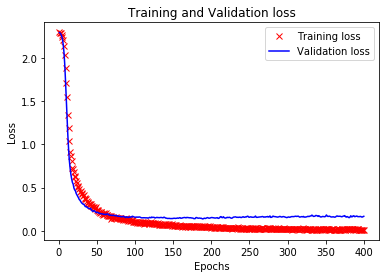

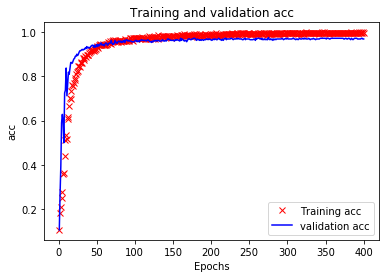

In [6]:
drow(train_history.history)

In [7]:
result=model1.predict(x_Test4D_normalize)
sess = tf.Session()
tf.argmax(result, 1).eval(session=sess)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 7, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 0, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [8]:
# 改变卷积核的大小
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model2 = Sequential()
model2.add(Conv2D(filters=16,
                 kernel_size=(4,4),
                 padding='same',
                 input_shape=(15,16,1), 
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation='softmax'))
metrics = Metrics()
model2.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model2.fit(x=x_Train4D_normalize, 
                        y=y_Train,validation_split=0.2, callbacks=[metrics],
                        epochs=400, batch_size=300,verbose=2,validation_data=(x_Test4D_normalize,y_Test))

Train on 1280 samples, validate on 320 samples
Epoch 1/400
 - 1s - loss: 2.3010 - accuracy: 0.1359 - val_loss: 2.2966 - val_accuracy: 0.3313


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/400
 - 0s - loss: 2.2947 - accuracy: 0.1867 - val_loss: 2.2874 - val_accuracy: 0.2844
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/400
 - 0s - loss: 2.2833 - accuracy: 0.2422 - val_loss: 2.2716 - val_accuracy: 0.3406
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/400
 - 0s - loss: 2.2674 - accuracy: 0.2648 - val_loss: 2.2451 - val_accuracy: 0.3688
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/400
 - 0s - loss: 2.2359 - accuracy: 0.2742 - val_loss: 2.2014 - val_accuracy: 0.4250
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/400
 - 0s - loss: 2.1876 - accuracy: 0.3328 - val_loss: 2.1329 - val_accuracy: 0.4844
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 7/400
 - 0s - loss: 2.1074 - accuracy: 0.3758 - val_loss: 2.0266 - val_accuracy: 0.4469
 — val_f1: 0.000000 — val_pr

 - 0s - loss: 0.2536 - accuracy: 0.9281 - val_loss: 0.2344 - val_accuracy: 0.9469
 — val_f1: 0.941176 — val_precision: 0.957929 — val_recall 0.925000
Epoch 53/400
 - 0s - loss: 0.2726 - accuracy: 0.9273 - val_loss: 0.2300 - val_accuracy: 0.9469
 — val_f1: 0.949206 — val_precision: 0.964516 — val_recall 0.934375
Epoch 54/400
 - 0s - loss: 0.2578 - accuracy: 0.9148 - val_loss: 0.2269 - val_accuracy: 0.9438
 — val_f1: 0.946032 — val_precision: 0.961290 — val_recall 0.931250
Epoch 55/400
 - 0s - loss: 0.2596 - accuracy: 0.9242 - val_loss: 0.2284 - val_accuracy: 0.9406
 — val_f1: 0.939683 — val_precision: 0.954839 — val_recall 0.925000
Epoch 56/400
 - 0s - loss: 0.2461 - accuracy: 0.9211 - val_loss: 0.2258 - val_accuracy: 0.9438
 — val_f1: 0.943038 — val_precision: 0.955128 — val_recall 0.931250
Epoch 57/400
 - 0s - loss: 0.2440 - accuracy: 0.9320 - val_loss: 0.2198 - val_accuracy: 0.9344
 — val_f1: 0.936709 — val_precision: 0.948718 — val_recall 0.925000
Epoch 58/400
 - 0s - loss: 0.2576 -

 — val_f1: 0.955975 — val_precision: 0.962025 — val_recall 0.950000
Epoch 103/400
 - 0s - loss: 0.1222 - accuracy: 0.9648 - val_loss: 0.1683 - val_accuracy: 0.9563
 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 104/400
 - 1s - loss: 0.1197 - accuracy: 0.9648 - val_loss: 0.1741 - val_accuracy: 0.9531
 — val_f1: 0.954474 — val_precision: 0.958991 — val_recall 0.950000
Epoch 105/400
 - 0s - loss: 0.1261 - accuracy: 0.9641 - val_loss: 0.1678 - val_accuracy: 0.9563
 — val_f1: 0.957614 — val_precision: 0.962145 — val_recall 0.953125
Epoch 106/400
 - 0s - loss: 0.1171 - accuracy: 0.9664 - val_loss: 0.1616 - val_accuracy: 0.9563
 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 107/400
 - 0s - loss: 0.1174 - accuracy: 0.9609 - val_loss: 0.1678 - val_accuracy: 0.9531
 — val_f1: 0.954474 — val_precision: 0.958991 — val_recall 0.950000
Epoch 108/400
 - 0s - loss: 0.1179 - accuracy: 0.9609 - val_loss: 0.1590 - val_accuracy: 0.9563
 — val_f1: 0.959

 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 153/400
 - 0s - loss: 0.0747 - accuracy: 0.9836 - val_loss: 0.1416 - val_accuracy: 0.9625
 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 154/400
 - 0s - loss: 0.0570 - accuracy: 0.9852 - val_loss: 0.1478 - val_accuracy: 0.9594
 — val_f1: 0.962382 — val_precision: 0.965409 — val_recall 0.959375
Epoch 155/400
 - 0s - loss: 0.0701 - accuracy: 0.9805 - val_loss: 0.1481 - val_accuracy: 0.9594
 — val_f1: 0.960876 — val_precision: 0.962382 — val_recall 0.959375
Epoch 156/400
 - 0s - loss: 0.0836 - accuracy: 0.9742 - val_loss: 0.1502 - val_accuracy: 0.9594
 — val_f1: 0.959248 — val_precision: 0.962264 — val_recall 0.956250
Epoch 157/400
 - 0s - loss: 0.0707 - accuracy: 0.9742 - val_loss: 0.1474 - val_accuracy: 0.9594
 — val_f1: 0.960754 — val_precision: 0.965300 — val_recall 0.956250
Epoch 158/400
 - 0s - loss: 0.0723 - accuracy: 0.9797 - val_loss: 0.1448 - val_accuracy: 0.9625
 — val_f1: 0.959

 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 203/400
 - 0s - loss: 0.0453 - accuracy: 0.9844 - val_loss: 0.1447 - val_accuracy: 0.9625
 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 204/400
 - 0s - loss: 0.0556 - accuracy: 0.9836 - val_loss: 0.1402 - val_accuracy: 0.9625
 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 205/400
 - 0s - loss: 0.0513 - accuracy: 0.9852 - val_loss: 0.1343 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 206/400
 - 1s - loss: 0.0451 - accuracy: 0.9867 - val_loss: 0.1378 - val_accuracy: 0.9625
 — val_f1: 0.965517 — val_precision: 0.968553 — val_recall 0.962500
Epoch 207/400
 - 1s - loss: 0.0551 - accuracy: 0.9797 - val_loss: 0.1434 - val_accuracy: 0.9625
 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 208/400
 - 0s - loss: 0.0438 - accuracy: 0.9875 - val_loss: 0.1489 - val_accuracy: 0.9656
 — val_f1: 0.965

 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 253/400
 - 1s - loss: 0.0298 - accuracy: 0.9937 - val_loss: 0.1476 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 254/400
 - 1s - loss: 0.0367 - accuracy: 0.9898 - val_loss: 0.1496 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 255/400
 - 0s - loss: 0.0307 - accuracy: 0.9914 - val_loss: 0.1534 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 256/400
 - 0s - loss: 0.0319 - accuracy: 0.9898 - val_loss: 0.1551 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 257/400
 - 1s - loss: 0.0401 - accuracy: 0.9883 - val_loss: 0.1537 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 258/400
 - 0s - loss: 0.0280 - accuracy: 0.9914 - val_loss: 0.1476 - val_accuracy: 0.9656
 — val_f1: 0.967

 — val_f1: 0.971875 — val_precision: 0.971875 — val_recall 0.971875
Epoch 303/400
 - 0s - loss: 0.0230 - accuracy: 0.9953 - val_loss: 0.1512 - val_accuracy: 0.9688
 — val_f1: 0.968750 — val_precision: 0.968750 — val_recall 0.968750
Epoch 304/400
 - 0s - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.1518 - val_accuracy: 0.9688
 — val_f1: 0.968750 — val_precision: 0.968750 — val_recall 0.968750
Epoch 305/400
 - 0s - loss: 0.0260 - accuracy: 0.9937 - val_loss: 0.1536 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 306/400
 - 1s - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.1656 - val_accuracy: 0.9656
 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 307/400
 - 1s - loss: 0.0247 - accuracy: 0.9914 - val_loss: 0.1636 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 308/400
 - 0s - loss: 0.0205 - accuracy: 0.9922 - val_loss: 0.1612 - val_accuracy: 0.9656
 — val_f1: 0.965

 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 353/400
 - 0s - loss: 0.0163 - accuracy: 0.9953 - val_loss: 0.1558 - val_accuracy: 0.9625
 — val_f1: 0.962500 — val_precision: 0.962500 — val_recall 0.962500
Epoch 354/400
 - 0s - loss: 0.0216 - accuracy: 0.9945 - val_loss: 0.1552 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 355/400
 - 1s - loss: 0.0171 - accuracy: 0.9937 - val_loss: 0.1523 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 356/400
 - 1s - loss: 0.0183 - accuracy: 0.9953 - val_loss: 0.1533 - val_accuracy: 0.9719
 — val_f1: 0.971875 — val_precision: 0.971875 — val_recall 0.971875
Epoch 357/400
 - 1s - loss: 0.0213 - accuracy: 0.9922 - val_loss: 0.1524 - val_accuracy: 0.9719
 — val_f1: 0.971875 — val_precision: 0.971875 — val_recall 0.971875
Epoch 358/400
 - 1s - loss: 0.0230 - accuracy: 0.9937 - val_loss: 0.1529 - val_accuracy: 0.9719
 — val_f1: 0.971

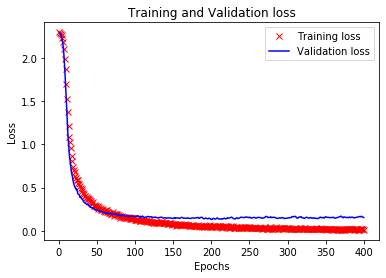

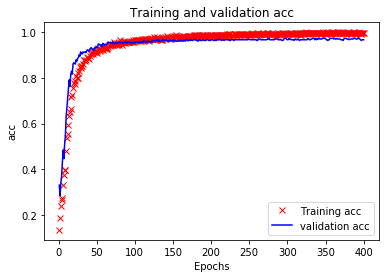

In [9]:
drow(train_history.history)

In [10]:
result=model2.predict(x_Test4D_normalize)
sess = tf.Session()
tf.argmax(result, 1).eval(session=sess)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 9,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 9, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [11]:
# 改变卷积核的大小
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model3 = Sequential()
model3.add(Conv2D(filters=16,
                 kernel_size=(3,3),
                 padding='same',
                 input_shape=(15,16,1), 
                 activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Conv2D(filters=36,
                 kernel_size=(3,36),
                 padding='same',
                 activation='relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation='softmax'))

In [12]:
metrics = Metrics()
model3.compile(loss='categorical_crossentropy',
              optimizer='adam',metrics=['accuracy']) 
train_history=model3.fit(x=x_Train4D_normalize, 
                        y=y_Train,validation_split=0.2, callbacks=[metrics],
                        epochs=400, batch_size=300,verbose=2,validation_data=(x_Test4D_normalize,y_Test))

Train on 1280 samples, validate on 320 samples
Epoch 1/400
 - 3s - loss: 2.3022 - accuracy: 0.1156 - val_loss: 2.3000 - val_accuracy: 0.2937


E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
E:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 2/400
 - 2s - loss: 2.2995 - accuracy: 0.1656 - val_loss: 2.2956 - val_accuracy: 0.4219
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 3/400
 - 2s - loss: 2.2942 - accuracy: 0.2117 - val_loss: 2.2880 - val_accuracy: 0.3938
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 4/400
 - 2s - loss: 2.2855 - accuracy: 0.2492 - val_loss: 2.2753 - val_accuracy: 0.2125
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 5/400
 - 2s - loss: 2.2707 - accuracy: 0.2953 - val_loss: 2.2541 - val_accuracy: 0.4250
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 6/400
 - 2s - loss: 2.2471 - accuracy: 0.3391 - val_loss: 2.2184 - val_accuracy: 0.5312
 — val_f1: 0.000000 — val_precision: 0.000000 — val_recall 0.000000
Epoch 7/400
 - 2s - loss: 2.2059 - accuracy: 0.3906 - val_loss: 2.1625 - val_accuracy: 0.7188
 — val_f1: 0.000000 — val_pr

 - 2s - loss: 0.2749 - accuracy: 0.9203 - val_loss: 0.2397 - val_accuracy: 0.9344
 — val_f1: 0.942857 — val_precision: 0.958065 — val_recall 0.928125
Epoch 53/400
 - 2s - loss: 0.2760 - accuracy: 0.9211 - val_loss: 0.2462 - val_accuracy: 0.9312
 — val_f1: 0.939873 — val_precision: 0.951923 — val_recall 0.928125
Epoch 54/400
 - 2s - loss: 0.2632 - accuracy: 0.9242 - val_loss: 0.2411 - val_accuracy: 0.9344
 — val_f1: 0.933754 — val_precision: 0.942675 — val_recall 0.925000
Epoch 55/400
 - 2s - loss: 0.2711 - accuracy: 0.9172 - val_loss: 0.2309 - val_accuracy: 0.9406
 — val_f1: 0.941732 — val_precision: 0.949206 — val_recall 0.934375
Epoch 56/400
 - 2s - loss: 0.2684 - accuracy: 0.9234 - val_loss: 0.2271 - val_accuracy: 0.9344
 — val_f1: 0.940063 — val_precision: 0.949045 — val_recall 0.931250
Epoch 57/400
 - 2s - loss: 0.2541 - accuracy: 0.9281 - val_loss: 0.2243 - val_accuracy: 0.9406
 — val_f1: 0.943218 — val_precision: 0.952229 — val_recall 0.934375
Epoch 58/400
 - 2s - loss: 0.2422 -

 — val_f1: 0.954474 — val_precision: 0.958991 — val_recall 0.950000
Epoch 103/400
 - 2s - loss: 0.1315 - accuracy: 0.9641 - val_loss: 0.1754 - val_accuracy: 0.9563
 — val_f1: 0.959248 — val_precision: 0.962264 — val_recall 0.956250
Epoch 104/400
 - 2s - loss: 0.1151 - accuracy: 0.9680 - val_loss: 0.1768 - val_accuracy: 0.9531
 — val_f1: 0.956113 — val_precision: 0.959119 — val_recall 0.953125
Epoch 105/400
 - 2s - loss: 0.1214 - accuracy: 0.9680 - val_loss: 0.1742 - val_accuracy: 0.9594
 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 106/400
 - 2s - loss: 0.1194 - accuracy: 0.9648 - val_loss: 0.1704 - val_accuracy: 0.9531
 — val_f1: 0.959119 — val_precision: 0.965190 — val_recall 0.953125
Epoch 107/400
 - 2s - loss: 0.1298 - accuracy: 0.9656 - val_loss: 0.1702 - val_accuracy: 0.9531
 — val_f1: 0.957614 — val_precision: 0.962145 — val_recall 0.953125
Epoch 108/400
 - 2s - loss: 0.1371 - accuracy: 0.9625 - val_loss: 0.1689 - val_accuracy: 0.9594
 — val_f1: 0.962

 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 153/400
 - 2s - loss: 0.0727 - accuracy: 0.9812 - val_loss: 0.1690 - val_accuracy: 0.9594
 — val_f1: 0.960876 — val_precision: 0.962382 — val_recall 0.959375
Epoch 154/400
 - 2s - loss: 0.0868 - accuracy: 0.9758 - val_loss: 0.1678 - val_accuracy: 0.9625
 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 155/400
 - 2s - loss: 0.0815 - accuracy: 0.9719 - val_loss: 0.1633 - val_accuracy: 0.9594
 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 156/400
 - 2s - loss: 0.0821 - accuracy: 0.9766 - val_loss: 0.1585 - val_accuracy: 0.9594
 — val_f1: 0.965409 — val_precision: 0.971519 — val_recall 0.959375
Epoch 157/400
 - 2s - loss: 0.0652 - accuracy: 0.9844 - val_loss: 0.1498 - val_accuracy: 0.9656
 — val_f1: 0.967033 — val_precision: 0.971609 — val_recall 0.962500
Epoch 158/400
 - 2s - loss: 0.0774 - accuracy: 0.9773 - val_loss: 0.1516 - val_accuracy: 0.9656
 — val_f1: 0.967

 — val_f1: 0.967033 — val_precision: 0.971609 — val_recall 0.962500
Epoch 203/400
 - 2s - loss: 0.0547 - accuracy: 0.9805 - val_loss: 0.1527 - val_accuracy: 0.9594
 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 204/400
 - 2s - loss: 0.0512 - accuracy: 0.9844 - val_loss: 0.1541 - val_accuracy: 0.9625
 — val_f1: 0.965517 — val_precision: 0.968553 — val_recall 0.962500
Epoch 205/400
 - 2s - loss: 0.0595 - accuracy: 0.9789 - val_loss: 0.1543 - val_accuracy: 0.9625
 — val_f1: 0.965517 — val_precision: 0.968553 — val_recall 0.962500
Epoch 206/400
 - 2s - loss: 0.0456 - accuracy: 0.9883 - val_loss: 0.1565 - val_accuracy: 0.9594
 — val_f1: 0.962382 — val_precision: 0.965409 — val_recall 0.959375
Epoch 207/400
 - 2s - loss: 0.0552 - accuracy: 0.9812 - val_loss: 0.1561 - val_accuracy: 0.9625
 — val_f1: 0.963893 — val_precision: 0.968454 — val_recall 0.959375
Epoch 208/400
 - 2s - loss: 0.0490 - accuracy: 0.9836 - val_loss: 0.1554 - val_accuracy: 0.9656
 — val_f1: 0.967

 — val_f1: 0.964006 — val_precision: 0.965517 — val_recall 0.962500
Epoch 253/400
 - 2s - loss: 0.0408 - accuracy: 0.9883 - val_loss: 0.1581 - val_accuracy: 0.9656
 — val_f1: 0.965625 — val_precision: 0.965625 — val_recall 0.965625
Epoch 254/400
 - 2s - loss: 0.0368 - accuracy: 0.9891 - val_loss: 0.1516 - val_accuracy: 0.9688
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 255/400
 - 2s - loss: 0.0317 - accuracy: 0.9906 - val_loss: 0.1536 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 256/400
 - 2s - loss: 0.0337 - accuracy: 0.9898 - val_loss: 0.1534 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 257/400
 - 2s - loss: 0.0267 - accuracy: 0.9937 - val_loss: 0.1545 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 258/400
 - 2s - loss: 0.0325 - accuracy: 0.9930 - val_loss: 0.1550 - val_accuracy: 0.9656
 — val_f1: 0.967

 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 303/400
 - 2s - loss: 0.0238 - accuracy: 0.9937 - val_loss: 0.1667 - val_accuracy: 0.9656
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 304/400
 - 2s - loss: 0.0294 - accuracy: 0.9922 - val_loss: 0.1620 - val_accuracy: 0.9688
 — val_f1: 0.968652 — val_precision: 0.971698 — val_recall 0.965625
Epoch 305/400
 - 2s - loss: 0.0255 - accuracy: 0.9922 - val_loss: 0.1574 - val_accuracy: 0.9719
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 306/400
 - 2s - loss: 0.0244 - accuracy: 0.9914 - val_loss: 0.1574 - val_accuracy: 0.9719
 — val_f1: 0.971875 — val_precision: 0.971875 — val_recall 0.971875
Epoch 307/400
 - 2s - loss: 0.0215 - accuracy: 0.9945 - val_loss: 0.1618 - val_accuracy: 0.9719
 — val_f1: 0.973396 — val_precision: 0.974922 — val_recall 0.971875
Epoch 308/400
 - 2s - loss: 0.0322 - accuracy: 0.9898 - val_loss: 0.1627 - val_accuracy: 0.9719
 — val_f1: 0.973

 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 353/400
 - 2s - loss: 0.0167 - accuracy: 0.9977 - val_loss: 0.1620 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 354/400
 - 2s - loss: 0.0247 - accuracy: 0.9937 - val_loss: 0.1646 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 355/400
 - 2s - loss: 0.0155 - accuracy: 0.9953 - val_loss: 0.1662 - val_accuracy: 0.9688
 — val_f1: 0.967136 — val_precision: 0.968652 — val_recall 0.965625
Epoch 356/400
 - 2s - loss: 0.0156 - accuracy: 0.9961 - val_loss: 0.1647 - val_accuracy: 0.9719
 — val_f1: 0.968652 — val_precision: 0.971698 — val_recall 0.965625
Epoch 357/400
 - 2s - loss: 0.0190 - accuracy: 0.9945 - val_loss: 0.1656 - val_accuracy: 0.9688
 — val_f1: 0.970266 — val_precision: 0.971787 — val_recall 0.968750
Epoch 358/400
 - 2s - loss: 0.0162 - accuracy: 0.9953 - val_loss: 0.1653 - val_accuracy: 0.9719
 — val_f1: 0.970

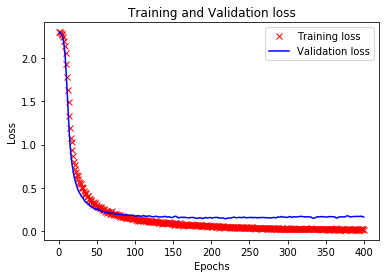

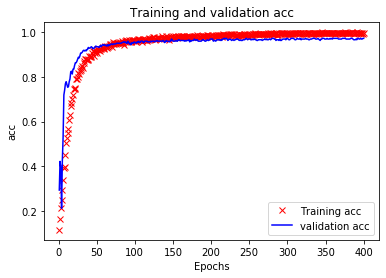

In [13]:
drow(train_history.history)


In [14]:
result=model3.predict(x_Test4D_normalize)
print(result[18])
sess = tf.Session()
tf.argmax(result, 1).eval(session=sess)

[9.9998558e-01 5.2617312e-12 1.3691225e-05 7.5822595e-07 8.0427963e-11
 3.6868306e-10 2.9803496e-10 3.9027222e-11 2.4509714e-09 3.7107133e-09]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 9,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 9, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 3, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 4, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 8, 8, 8, 8, 8,
       8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,

In [15]:
# 模型融合
def mix(m1,m2,m3,w1,w2,w3,X):
    result1=m1.predict(X)
    result2=m2.predict(X)
    result3=m3.predict(X)
    result=(w1*result1+w2*result2+w3*result3)/3.0
    sess = tf.Session()
    output=tf.argmax(result, 1).eval(session=sess)
    return output

In [24]:
df = pd.read_csv('data/pix_test.csv', header = None)
df=df[1:]
df=df.astype(int)
test=df.values
x_Test=test[:,0:240]
y_Test=test[:,240]
a=mix(model1,model2,model3,1,1,1,x_Test4D_normalize)
model_f1_score=f1_score(y_Test,a,average='micro')
print(a)
print(model_f1_score)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 6 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 2 2 2 2 2 2 9 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 1 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 9 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 3 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 9 8 8 8 8 8 8 8 9 9 9 9 9 9 9 9
 9 9 9 9 9 9 9 9 9 9 9 9 9 9 1 9 9 9 9 9 9 9 9 9]
0.971875


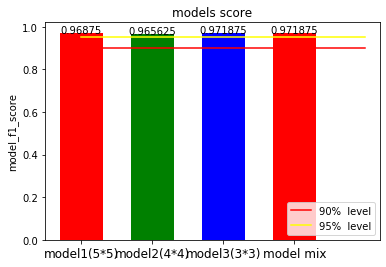

In [25]:
#改变绘图风格
cell = ['model1(5*5)','model2(4*4)','model3(3*3)','model mix']
pvalue = [ 0.968750,0.965625,0.971875 ,model_f1_score]


width = 0.60
index = np.arange(len(cell)) 
p1 = np.arange(0,len(cell),0.01)
p2 = 0.9 + p1*0

q1 = np.arange(0,len(cell),0.01)
q2 = 0.95 + p1*0

figsize = (20,16)#调整绘制图片的比例
plt.plot(p1,p2,color = 'red',label = '90%  level')#绘制直线
plt.plot(q1,q2,color = 'yellow',label = '95%  level')#绘制直线
#若是不想显示直线，可以直接将上面两行注释掉
plt.bar(index, pvalue, width,color='rgb') #绘制柱状图
for xx, yy in zip(index,pvalue):
    plt.text(xx, yy, str(yy), ha='center')
#plt.xlabel('cell type') #x轴
plt.ylabel('model_f1_score') #y轴
plt.title('models score') #图像的名称
plt.xticks(index, cell,fontsize=12) #将横坐标用cell替换,fontsize用来调整字体的大小
plt.legend() #显示label
plt.savefig('test.png',dpi = 400) #保存图像，dpi可以调整图像的像素大小